the test image is: /output/test_images/toy30.jpg
[[9.9995005e-01 5.3053866e-03 4.1769175e-03 2.0159418e-03 1.6808730e-03
  1.5191423e-03 1.4204463e-03 1.3933729e-03 1.0249341e-03 9.8142482e-04
  9.7807928e-04 9.7142707e-04 9.3927019e-04 9.2833443e-04 9.1657694e-04
  8.7402365e-04 7.9056330e-04 7.8888779e-04 7.8456057e-04 7.5959280e-04
  7.1151101e-04 6.8168639e-04 6.6629739e-04 6.6423870e-04 6.2334345e-04
  6.0802232e-04 5.7016732e-04 5.6882255e-04 5.5714732e-04 5.1257049e-04
  5.0305738e-04 4.9967342e-04 4.8576065e-04 4.7514183e-04 4.7502495e-04
  4.6763913e-04 4.6505613e-04 4.6335207e-04 4.6181600e-04 4.6030985e-04
  4.5943054e-04 4.5878347e-04 4.4943692e-04 4.4909769e-04 4.4425650e-04
  4.4204714e-04 4.3937005e-04 4.3111216e-04 4.2271294e-04 4.1619028e-04
  4.1293487e-04 4.1111867e-04 4.0338736e-04 4.0333348e-04 3.9779383e-04
  3.9445286e-04 3.8904051e-04 3.8889141e-04 3.7946901e-04 3.7396597e-04
  3.7226558e-04 3.6568046e-04 3.6025865e-04 3.5891347e-04 3.5314777e-04
  3.5151333e-04

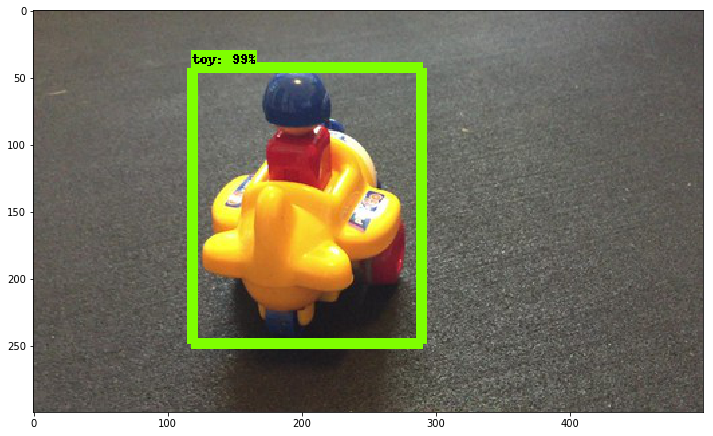

In [7]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from utils import label_map_util
from utils import visualization_utils as vis_util



# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("/output/models/research/")

PATH_TO_CKPT =  '/output/mymodel/frozen_inference_graph.pb'
PATH_TO_LABELS = '/output/tensorflow_object_detection_api_demo/pet_label_map.pbtxt'
TEST_IMAGE ='/output/tensorflow_object_detection_api_demo/images/toy30.jpg'

NUM_CLASSES = 1

#Load a (frozen) Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
    
#Loading label map
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

#Helper code
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)



print ('the test image is:', TEST_IMAGE)

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    #for image_path in TEST_IMAGE_PATHS:
    image = Image.open(TEST_IMAGE)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    scores = detection_graph.get_tensor_by_name('detection_scores:0')
    classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    # Actual detection.
    (boxes, scores, classes, num_detections) = sess.run(
        [boxes, scores, classes, num_detections],
        feed_dict={image_tensor: image_np_expanded})
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        np.squeeze(boxes),
        np.squeeze(classes).astype(np.int32),
        np.squeeze(scores),
        category_index,
        use_normalized_coordinates=True,
        line_thickness=8)

    print(scores)  
    print(classes)  
    print(category_index) 
   
    final_score = np.squeeze(scores)    
    count = 0
    for i in range(100):
        if scores is None or final_score[i] > 0.5:
            count = count + 1
    print ('the count of objects is: ', count)    

    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)
    plt.show()

